## Income Qualification
Predict Level of Income on Income Qualification

### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Explore the dataset

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [4]:
train_df.shape

(9557, 143)

In [5]:
train_df.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


### Identify the output variable

In [6]:
train_df[['Target']]

,Target
0,4
1,4
2,4
3,4
4,4
...,...
9552,2
9553,2
9554,2
9555,2


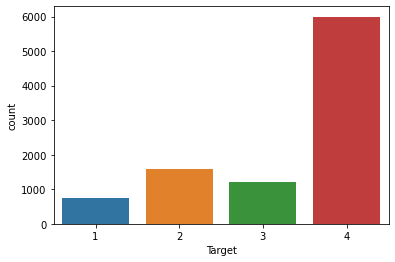

In [7]:
sns.countplot(train_df['Target'])

In [8]:
train_df['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

### Understand the type of data

In [9]:
for col in train_df:
    print(col, train_df[col].dtypes)

Id object
v2a1 float64
hacdor int64
rooms int64
hacapo int64
v14a int64
refrig int64
v18q int64
v18q1 float64
r4h1 int64
r4h2 int64
r4h3 int64
r4m1 int64
r4m2 int64
r4m3 int64
r4t1 int64
r4t2 int64
r4t3 int64
tamhog int64
tamviv int64
escolari int64
rez_esc float64
hhsize int64
paredblolad int64
paredzocalo int64
paredpreb int64
pareddes int64
paredmad int64
paredzinc int64
paredfibras int64
paredother int64
pisomoscer int64
pisocemento int64
pisoother int64
pisonatur int64
pisonotiene int64
pisomadera int64
techozinc int64
techoentrepiso int64
techocane int64
techootro int64
cielorazo int64
abastaguadentro int64
abastaguafuera int64
abastaguano int64
public int64
planpri int64
noelec int64
coopele int64
sanitario1 int64
sanitario2 int64
sanitario3 int64
sanitario5 int64
sanitario6 int64
energcocinar1 int64
energcocinar2 int64
energcocinar3 int64
energcocinar4 int64
elimbasu1 int64
elimbasu2 int64
elimbasu3 int64
elimbasu4 int64
elimbasu5 int64
elimbasu6 int64
epared1 int64
epared2 int

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [11]:
train_df[['Id','parentesco1']]

,Id,parentesco1
0,ID_279628684,1
1,ID_f29eb3ddd,1
2,ID_68de51c94,1
3,ID_d671db89c,0
4,ID_d56d6f5f5,0
...,...,...
9552,ID_d45ae367d,1
9553,ID_c94744e07,0
9554,ID_85fc658f8,0
9555,ID_ced540c61,0


In [12]:
train_df[['Id','parentesco1']].loc[train_df['parentesco1'] == 0]

,Id,parentesco1
3,ID_d671db89c,0
4,ID_d56d6f5f5,0
6,ID_e9e0c1100,0
7,ID_3e04e571e,0
9,ID_51f52fdd2,0
...,...,...
9550,ID_90a399a51,0
9553,ID_c94744e07,0
9554,ID_85fc658f8,0
9555,ID_ced540c61,0


In [13]:
train_df[['Id','dependency']]

,Id,dependency
0,ID_279628684,no
1,ID_f29eb3ddd,8
2,ID_68de51c94,8
3,ID_d671db89c,yes
4,ID_d56d6f5f5,yes
...,...,...
9552,ID_d45ae367d,.25
9553,ID_c94744e07,.25
9554,ID_85fc658f8,.25
9555,ID_ced540c61,.25


In [14]:
train_df[['Id','idhogar']]

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658
2,ID_68de51c94,2c7317ea8
3,ID_d671db89c,2b58d945f
4,ID_d56d6f5f5,2b58d945f
...,...,...
9552,ID_d45ae367d,d6c086aa3
9553,ID_c94744e07,d6c086aa3
9554,ID_85fc658f8,d6c086aa3
9555,ID_ced540c61,d6c086aa3


### Data Preprocessing

In [15]:
for col in train_df.columns:
    if(train_df[col].nunique() == 1):
        print(col)

elimbasu5


In [16]:
train_df.drop('elimbasu5', axis = 1, inplace = True)

In [17]:
duplicate_rows = train_df[train_df.duplicated()]
duplicate_rows

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [18]:
train_df.isna().any()

Id                 False
v2a1                True
hacdor             False
rooms              False
hacapo             False
                   ...  
SQBovercrowding    False
SQBdependency      False
SQBmeaned           True
agesq              False
Target             False
Length: 142, dtype: bool

### Count how many null values are existing in column

In [19]:
train_df.isna().any()[train_df.isna().any()].index.values

array(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype=object)

In [20]:
train_df.isna().sum()[['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']]

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64

In [21]:
train_df.isna().sum()[['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned']]/len(train_df)*100

v2a1         71.779847
v18q1        76.823271
rez_esc      82.954902
meaneduc      0.052318
SQBmeaned     0.052318
dtype: float64

Drop the columns as null values in these three columns is in greater extent so it will be better if we drop these columns

In [22]:
train_df = train_df.drop(['v2a1', 'v18q1', 'rez_esc'], axis = 1)

In [23]:
train_df.shape

(9557, 139)

Drop the null rows as count of null value is very less so it will be better if we drop only row which contains null

In [24]:
train_df[['meaneduc', 'SQBmeaned']].dtypes

meaneduc     float64
SQBmeaned    float64
dtype: object

In [25]:
train_df.dropna(subset = ['meaneduc', 'SQBmeaned'], inplace = True)

In [26]:
train_df.shape

(9552, 139)

In [27]:
train_df.isna().any()[train_df.isna().any()].index.values

array([], dtype=object)

### There is no null value rows in the target variable

In [28]:
train_df.isna().any()['Target']

False

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 139 entries, Id to Target
dtypes: float64(5), int64(129), object(5)
memory usage: 10.2+ MB


In [30]:
train_df.dtypes

Id                  object
hacdor               int64
rooms                int64
hacapo               int64
v14a                 int64
                    ...   
SQBovercrowding    float64
SQBdependency      float64
SQBmeaned          float64
agesq                int64
Target               int64
Length: 139, dtype: object

### Check whether all memebers of the house have same poverty level

In [31]:
same_Plevel = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('There are {} house where the family members have the same target (poverty level).'.format(len(same_Plevel)))

There are 2985 house where the family members have the same target (poverty level).


In [32]:
not_same_Plevel = same_Plevel[same_Plevel != True]
print('There are {} house where the family members do not all have the same target (poverty level).'.format(len(not_same_Plevel)))

There are 85 house where the family members do not all have the same target (poverty level).


In [33]:
#one house
train_df[train_df['idhogar'] == not_same_Plevel.index[0]][['idhogar', 'parentesco1', 'Target']]


,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


### Check if there is a house without a family head

In [34]:
house_with_head = train_df.groupby('idhogar')['parentesco1'].sum()
house_without_head = train_df.loc[train_df['idhogar'].isin(house_with_head[house_with_head == 0].index), :]

print('There are {} house without a family head.'.format(house_without_head['idhogar'].nunique()))

There are 15 house without a family head.


In [35]:
house_without_head_same_Plevel = house_without_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('There are {} house without  head have different Target value(Poverty level).'.format(sum(house_without_head_same_Plevel == False)))

There are 0 house without  head have different Target value(Poverty level).


### Set poverty level of members and head of the house within a family

In [36]:
for house in not_same_Plevel.index:
    true_target = int(train_df[(train_df['idhogar'] == house) & (train_df['parentesco1'] == 1.0)]['Target'])
    train_df.loc[train_df['idhogar'] == house, 'Target'] = true_target
same_Plevel = train_df.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('There are {} house where the family members have the same target(Poverty level).'.format(len(same_Plevel)))

There are 2985 house where the family members have the same target(Poverty level).


In [37]:
not_same_Plevel= same_Plevel[same_Plevel != True]
print('There are {} house where the family members do not have the same target.'.format(len(not_same_Plevel)))

There are 0 house where the family members do not have the same target.


In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 139 entries, Id to Target
dtypes: float64(5), int64(129), object(5)
memory usage: 10.2+ MB


In [39]:
for col in train_df.columns:
    if(train_df[col].dtype == 'float64'):
        print(col)

meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


### Feature Engineering

### Check outliers

In [40]:
plot_col = train_df[['meaneduc', 'overcrowding', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned']]
pd.melt(plot_col)

,variable,value
0,meaneduc,10.0000
1,meaneduc,12.0000
2,meaneduc,11.0000
3,meaneduc,11.0000
4,meaneduc,11.0000
...,...,...
47755,SQBmeaned,68.0625
47756,SQBmeaned,68.0625
47757,SQBmeaned,68.0625
47758,SQBmeaned,68.0625


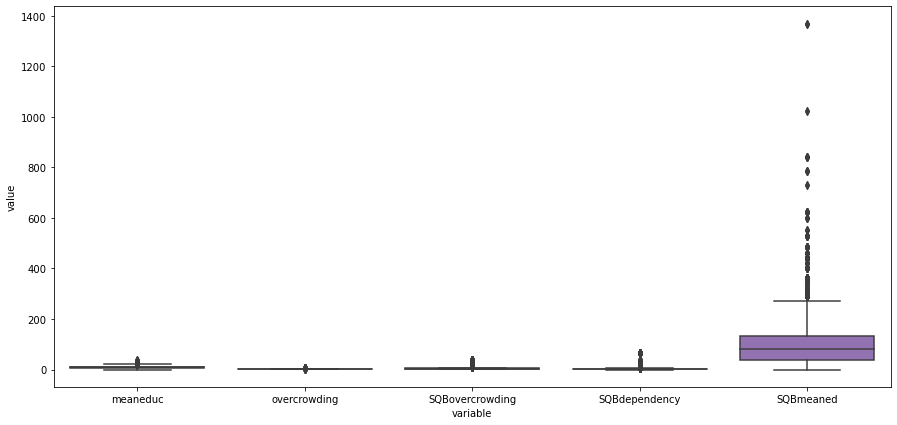

In [41]:
ax , fig = plt.subplots(figsize = (15,7))
sns.boxplot(x = 'variable', y='value', data = pd.melt(plot_col))

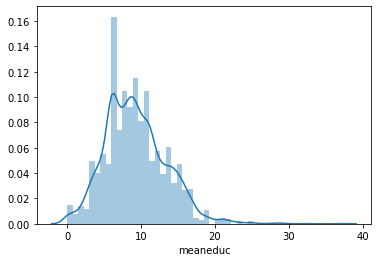

In [42]:
sns.distplot(train_df['meaneduc'])

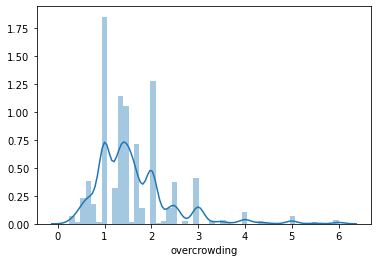

In [43]:
sns.distplot(train_df['overcrowding'])

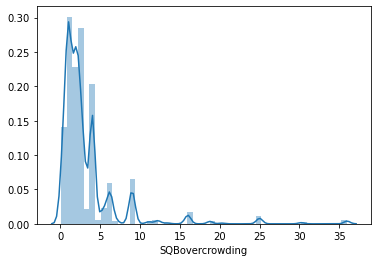

In [44]:
sns.distplot(train_df['SQBovercrowding'])

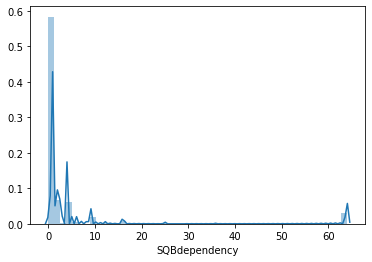

In [45]:
sns.distplot(train_df['SQBdependency'])

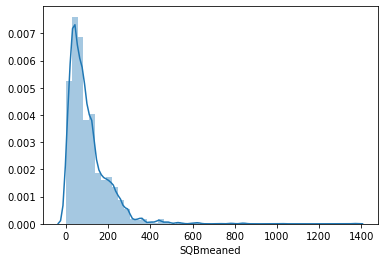

In [46]:
sns.distplot(train_df['SQBmeaned'])

### Remove outliers after observing distribution plot

In [47]:
def remove_outlier_normal(df, column):
    lower_limit = df[column].mean() - 3*df[column].std()
    upper_limit = df[column].mean() + 3*df[column].std()
    return lower_limit, upper_limit

In [48]:
lower_limit, upper_limit = remove_outlier_normal(train_df, 'meaneduc')
train_df = train_df[(train_df['meaneduc'] < upper_limit) & (train_df['meaneduc'] > lower_limit)]

In [49]:
lower_limit, upper_limit = remove_outlier_normal(train_df, 'overcrowding')
train_df = train_df[(train_df['overcrowding'] < upper_limit) & (train_df['overcrowding'] > lower_limit)]

In [50]:
def remove_outlier_skewed(df, column):
    IQR = df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_limit = df[column].quantile(0.25) - (IQR*1.5)
    upper_limit = df[column].quantile(0.75) + (IQR*1.5)
    return lower_limit, upper_limit

In [51]:
lower_limit, upper_limit = remove_outlier_skewed(train_df, 'SQBovercrowding')
train_df = train_df[(train_df['SQBovercrowding'] < upper_limit) & (train_df['SQBovercrowding'] > lower_limit)]

In [52]:
lower_limit, upper_limit = remove_outlier_skewed(train_df, 'SQBdependency')
train_df = train_df[(train_df['SQBdependency'] < upper_limit) & (train_df['SQBdependency'] > lower_limit)]

In [53]:
lower_limit, upper_limit = remove_outlier_skewed(train_df, 'SQBmeaned')
train_df = train_df[(train_df['SQBmeaned'] < upper_limit) & (train_df['SQBmeaned'] > lower_limit)]

In [54]:
train_df.shape

(7323, 139)

In [55]:
for col in train_df:
    if(train_df[col].dtype == 'object'):
        print(col)

Id
idhogar
dependency
edjefe
edjefa


In [56]:
train_df['idhogar'].value_counts()

3fe29a56b    11
4476ccd4c    11
a18c0c0be    10
0fc6c05f7    10
ae489f548     9
             ..
374ca5a19     1
4c80ff6b6     1
3846bd978     1
796b14867     1
31730de9f     1
Name: idhogar, Length: 2287, dtype: int64

### Drop 'Id' and 'idhogar' Columns as there is no need of these columns in further work

In [57]:
train_df.drop(['Id', 'idhogar'], axis = 1, inplace = True)

In [58]:
train_df['dependency'].value_counts()

yes          1955
no           1726
.5           1317
1.5           642
.33333334     582
.66666669     457
.25           245
.2             90
.40000001      84
.75            84
1.3333334      77
1.2            11
.83333331      11
1.25            9
.2857143        9
.80000001       9
.60000002       8
.16666667       7
Name: dependency, dtype: int64

In [59]:
train_df['edjefe'].value_counts()

no     2653
6      1556
11      689
9       397
15      239
8       220
3       198
7       190
14      178
2       142
17      142
5       130
16      111
12      107
4        96
13       90
10       85
yes      70
18       12
21        8
19        7
20        3
Name: edjefe, dtype: int64

In [60]:
train_df['edjefa'].value_counts()

no     4939
6       687
11      267
9       167
15      164
8       158
7       111
3       106
16       96
14       95
5        95
4        80
2        71
10       69
17       60
12       53
13       49
yes      48
18        3
19        3
20        2
Name: edjefa, dtype: int64

### Mapping the categorical values of column into numerical value based on other values of column

In [61]:
def mapping(value):
    if value=='yes':
        return(float(1))
    elif value=='no':
        return(float(0))
    else:
        return(float(value))

In [62]:
train_df['dependency']=train_df['dependency'].apply(mapping)

In [63]:
def mapping_int(value):
    if value=='yes':
        return (int(1))
    elif value=='no':
        return (int(0))
    else:
        return (int(value))

In [64]:
train_df['edjefe']=train_df['edjefe'].apply(mapping_int)

train_df['edjefa']=train_df['edjefa'].apply(mapping_int)

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7323 entries, 0 to 9556
Columns: 137 entries, hacdor to Target
dtypes: float64(6), int64(131)
memory usage: 7.7 MB


In [66]:
features = train_df.drop('Target', axis = 1)
target = train_df[['Target']]

### Count the level of proverty in target column by using countplot

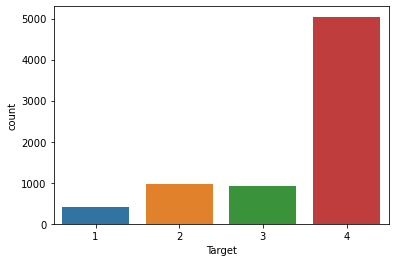

In [67]:
sns.countplot(target['Target'])
# Here we can see data is biased towards poverty level 4

In [68]:
target['Target'].value_counts()

4    5045
2     959
3     911
1     408
Name: Target, dtype: int64

### OverSampling on features and target as data is biased towards some level

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
features, target = sm.fit_resample(features, target)

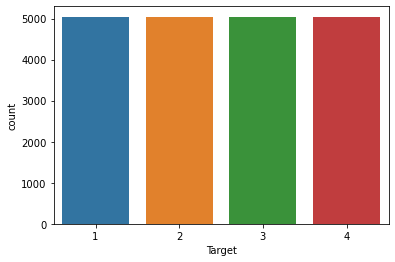

In [70]:
sns.countplot(target['Target'])
# Now we can see data is evenly distributed among all the poverty level

In [71]:
target['Target'].value_counts()

4    5045
3    5045
2    5045
1    5045
Name: Target, dtype: int64

In [72]:
features.shape, target.shape

((20180, 136), (20180, 1))

### Split the data into train, test and validation
Here I have splitted data into train, test and validation where I have first splitted data into train and temp_test in the ratio of 60:40, after that I have splitted temp_test into test and validation in the ratio of 50:50. Overall train contains 60% of data whereas test and validation contains 20% and 20% of data.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_temp_test, y_train, y_temp_test = train_test_split(features, target, test_size = 0.4, random_state = 42)

In [74]:
X_train.shape, X_temp_test.shape, y_train.shape, y_temp_test.shape

((12108, 136), (8072, 136), (12108, 1), (8072, 1))

In [75]:
X_val, X_test, y_val, y_test = train_test_split(X_temp_test, y_temp_test, test_size = 0.5, random_state = 42)

In [76]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((12108, 136), (4036, 136), (4036, 136), (12108, 1), (4036, 1), (4036, 1))

### Model Evaluation

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
Accuracy_score = []
Algorithm = []

### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
Algorithm.append('DecisionTreeClassifier')
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
predict_test = dt_classifier.predict(X_test)
Accuracy_score.append(accuracy_score(y_test, predict_test))

In [79]:
predict_val = dt_classifier.predict(X_val)
accuracy_score(y_val, predict_val)

0.8384539147670962

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
Algorithm.append('RandomForestClassifier')
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
predict_test = rf_classifier.predict(X_test)
Accuracy_score.append(accuracy_score(y_test, predict_test))

In [81]:
predict_val = rf_classifier.predict(X_val)
accuracy_score(y_val, predict_val)

0.9474727452923687

### Support Vector Classifier

In [82]:
from sklearn.svm import SVC
Algorithm.append('SupportVectorClassifier')
sv_classifier = SVC()
sv_classifier.fit(X_train, y_train)
predict_test = sv_classifier.predict(X_test)
Accuracy_score.append(accuracy_score(y_test, predict_test))

In [83]:
predict_val = sv_classifier.predict(X_val)
accuracy_score(y_val, predict_val)

0.372398414271556

In [84]:
for i in Algorithm, Accuracy_score:
    print(i,end=',')

['DecisionTreeClassifier', 'RandomForestClassifier', 'SupportVectorClassifier'],[0.8439048562933598, 0.9392963330029732, 0.360009910802775],

After evaluating all the model on our data I have observed that Random Forest Classifier is performing far better than any other model, So I have decided to do further task or prediction by using Random Forest Classifier

### Accuracy on train, test and validation data

In [85]:
#Now I am going with RandomForestClassifier
predict_train = rf_classifier.predict(X_train)
accuracy_score(y_train, predict_train)*100

100.0

In [86]:
predict_val = rf_classifier.predict(X_val)
accuracy_score(y_val, predict_val)*100

94.74727452923688

In [87]:
predict_test = rf_classifier.predict(X_test)
accuracy_score(y_test, predict_test)*100

93.92963330029733

### Classification report and confusion matrix on test data

In [88]:
print('Confusion matrix: ')
print(confusion_matrix(y_test, predict_test))

Confusion matrix: 
[[1010   14   10   11]
 [  35  909   32   25]
 [  21   43  896   30]
 [   5   12    7  976]]


In [89]:
print('Classification report: ')
print(classification_report(y_test, predict_test))

Classification report: 
              precision    recall  f1-score   support

           1       0.94      0.97      0.95      1045
           2       0.93      0.91      0.92      1001
           3       0.95      0.91      0.93       990
           4       0.94      0.98      0.96      1000

    accuracy                           0.94      4036
   macro avg       0.94      0.94      0.94      4036
weighted avg       0.94      0.94      0.94      4036



### Evaluate the model using cross validation

In [90]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(rf_classifier,X_val,y_val,cv = 10,scoring = 'accuracy')
cross_val

array([0.84158416, 0.8490099 , 0.85891089, 0.85643564, 0.84405941,
       0.84653465, 0.8560794 , 0.83622829, 0.8560794 , 0.84863524])

In [91]:
print(cross_val.mean()*100)

84.93556985971551


### Explore test dataset

In [92]:
test_df = pd.read_csv('test.csv')

In [93]:
test_df

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


### Do data preprocessing same as train data
Drop that rows and column from test datsets that I have already dropped on train datasets

In [94]:
test_df.drop('elimbasu5', axis = 1, inplace = True)

In [95]:
test_df.isna().any()[test_df.isna().any()].index.values

array(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype=object)

In [96]:
test_df = test_df.drop(['v2a1', 'v18q1', 'rez_esc'], axis = 1)

In [97]:
test_df.dropna(subset = ['meaneduc', 'SQBmeaned'], inplace = True)

### Do feature engineering same as train data

In [98]:
lower_limit, upper_limit = remove_outlier_normal(test_df, 'meaneduc')
test_df = test_df[(test_df['meaneduc'] < upper_limit) & (test_df['meaneduc'] > lower_limit)]

In [99]:
lower_limit, upper_limit = remove_outlier_normal(test_df, 'overcrowding')
test_df = test_df[(test_df['overcrowding'] < upper_limit) & (test_df['overcrowding'] > lower_limit)]

In [100]:
lower_limit, upper_limit = remove_outlier_skewed(test_df, 'SQBovercrowding')
test_df = test_df[(test_df['SQBovercrowding'] < upper_limit) & (test_df['SQBovercrowding'] > lower_limit)]

In [101]:
lower_limit, upper_limit = remove_outlier_skewed(test_df, 'SQBdependency')
test_df = test_df[(test_df['SQBdependency'] < upper_limit) & (test_df['SQBdependency'] > lower_limit)]

In [102]:
lower_limit, upper_limit = remove_outlier_skewed(test_df, 'SQBmeaned')
test_df = test_df[(test_df['SQBmeaned'] < upper_limit) & (test_df['SQBmeaned'] > lower_limit)]

In [103]:
test_df.shape

(18084, 138)

In [104]:
test_df.drop(['Id', 'idhogar'], axis = 1,inplace = True)

### Create backup of test data

In [105]:
test_df1 = test_df.copy()

In [106]:
test_df['dependency']=test_df['dependency'].apply(mapping)
test_df['edjefe']=test_df['edjefe'].apply(mapping_int)
test_df['edjefa']=test_df['edjefa'].apply(mapping_int)

In [107]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18084 entries, 0 to 23855
Columns: 136 entries, hacdor to agesq
dtypes: float64(6), int64(130)
memory usage: 18.9 MB


### Predict the target(Poverty level) level on test datasets

In [108]:
prediction_on_final_testdf = rf_classifier.predict(test_df)

In [109]:
prediction_on_final_testdf

array([4, 4, 4, ..., 2, 2, 2], dtype=int64)

In [110]:
column_name = ['Predicted_Proverty_Level']
Final_Predictions = pd.DataFrame(prediction_on_final_testdf , columns = column_name)

In [111]:
Final_Predictions['Predicted_Proverty_Level'].value_counts()

4    13966
2     1935
3     1623
1      560
Name: Predicted_Proverty_Level, dtype: int64

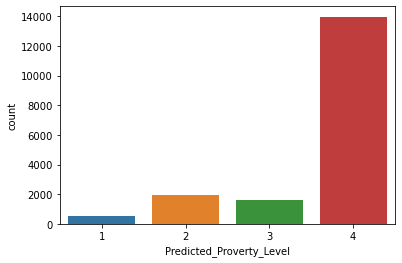

In [112]:
sns.countplot(Final_Predictions['Predicted_Proverty_Level'])

Merge Final_predictions dataFrame with backup of test data based on the index of test_df

In [113]:
test_df1.reset_index(drop=True,inplace=True)
Final = test_df1.merge(Final_Predictions , on = test_df.index )

In [114]:
Final

,key_0,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Predicted_Proverty_Level
0,0,0,5,0,1,1,0,1,1,2,...,0,16,9,0,1,2.25,0.25,272.25,16,4
1,1,0,5,0,1,1,0,1,1,2,...,256,1681,9,0,1,2.25,0.25,272.25,1681,4
2,2,0,5,0,1,1,0,1,1,2,...,289,1681,9,0,1,2.25,0.25,272.25,1681,4
3,3,0,14,0,1,1,1,0,1,1,...,256,3481,1,256,0,1.00,0.00,256.00,3481,4
4,5,0,3,0,1,1,1,0,0,0,...,256,1444,4,0,0,1.00,0.00,182.25,1444,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079,23845,0,5,0,1,1,0,0,1,1,...,121,1089,9,0,1,1.00,0.25,30.25,1089,4
18080,23852,0,3,0,1,1,0,0,1,1,...,36,2916,16,36,4,4.00,1.00,36.00,2916,2
18081,23853,0,3,0,1,1,0,0,1,1,...,16,144,16,36,4,4.00,1.00,36.00,144,2
18082,23854,0,3,0,1,1,0,0,1,1,...,25,144,16,36,4,4.00,1.00,36.00,144,2


In [115]:
Final.drop('key_0', axis = 1, inplace = True)

In [116]:
Final.shape

(18084, 137)

### Convert Final dataframe into csv file
Here Final dataframe contains all important features with predicted poverty level 

In [117]:
Final.to_csv('Final.csv', index = False)